In [289]:
#load the data

import pandas as pd

sales=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [290]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [327]:
sales.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [291]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [292]:
sales.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [293]:
sales.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

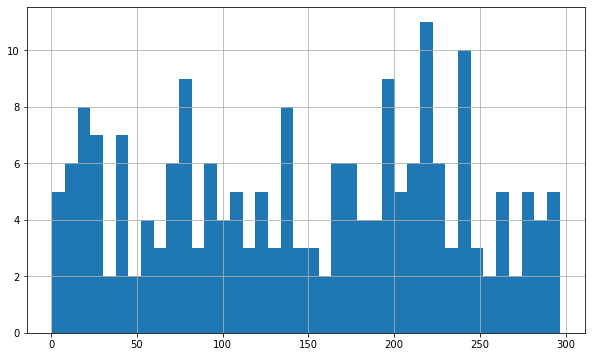

In [295]:
sales['TV'].hist(bins=40, figsize=(10,6))

<AxesSubplot:>

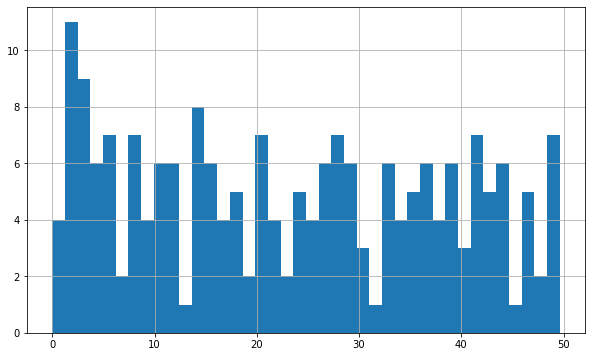

In [296]:
sales['radio'].hist(bins=40, figsize=(10,6))

<AxesSubplot:>

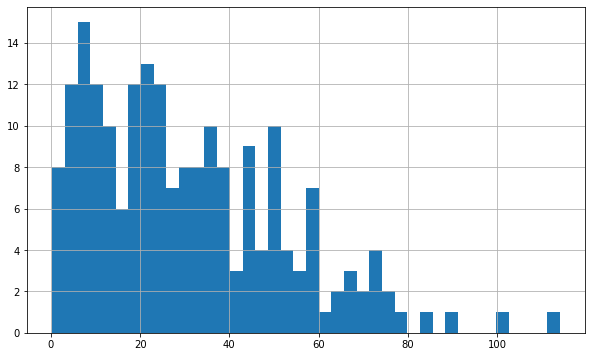

In [297]:
sales['newspaper'].hist(bins=40, figsize=(10,6))

<AxesSubplot:xlabel='sales', ylabel='TV'>

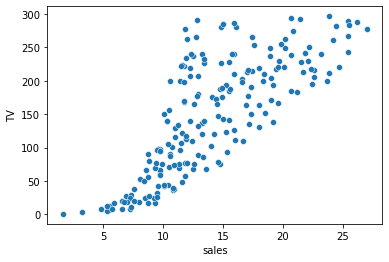

In [298]:
sns.scatterplot(x="sales",y='TV',data=sales)

<AxesSubplot:xlabel='sales', ylabel='radio'>

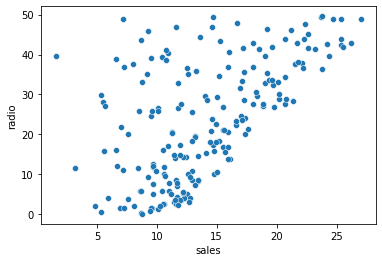

In [299]:
sns.scatterplot(x="sales",y='radio',data=sales)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

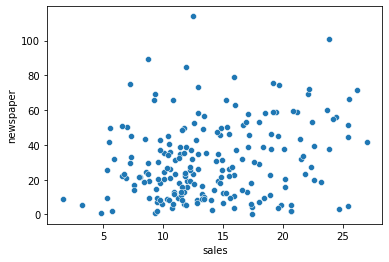

In [300]:
sns.scatterplot(x="sales",y='newspaper',data=sales)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

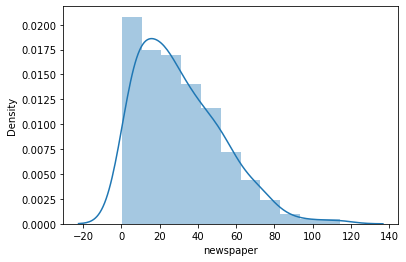

In [301]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(sales['newspaper'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

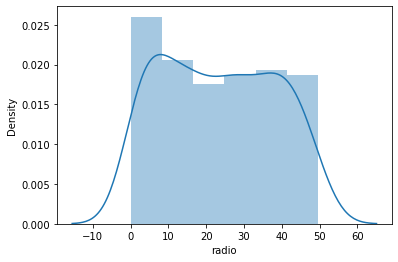

In [302]:
sns.distplot(sales['radio'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

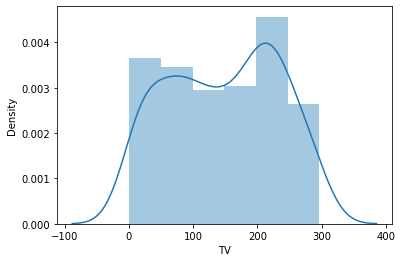

In [303]:
sns.distplot(sales['TV'])

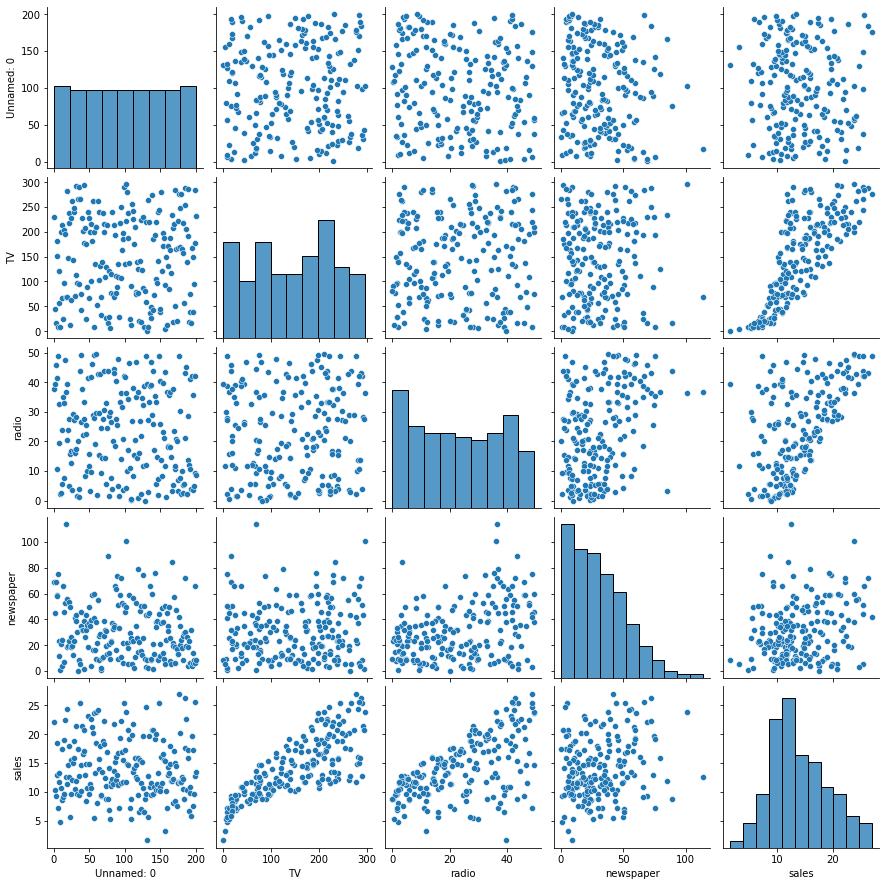

In [304]:
sns.pairplot(sales)

In [305]:
sales.drop('Unnamed: 0', axis=1, inplace=True)

In [306]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [307]:
sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [308]:
sales.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

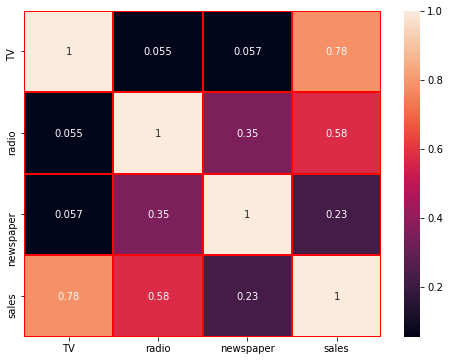

In [309]:
plt.figure(figsize=(8,6))
sns.heatmap(sales.corr(), annot=True, linewidth=1,linecolor='red')

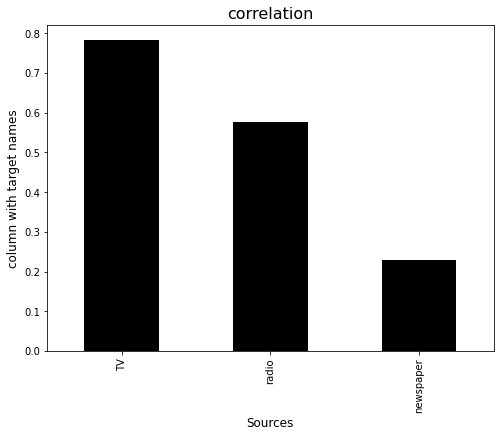

In [310]:
plt.figure(figsize=(8,6))
sales.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='black')
plt.xlabel('Sources',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=16)
plt.show()

In [311]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

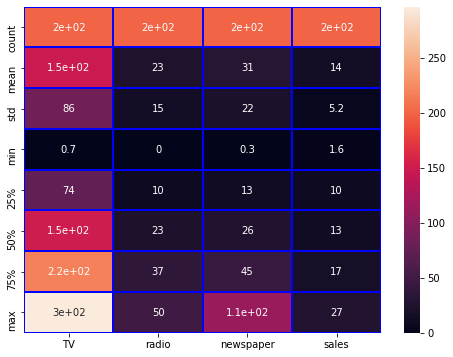

In [312]:
plt.figure(figsize=(8,6))
sns.heatmap(sales.describe(),annot=True,linewidth=1,linecolor='blue')

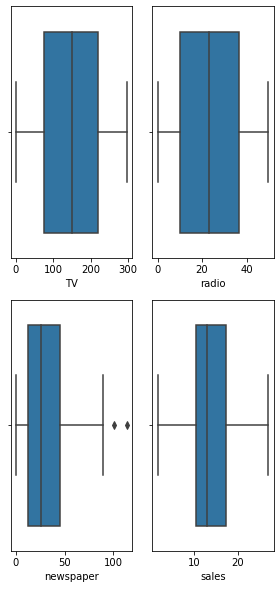

In [313]:
#to check outliers
collist=sales.columns.values
ncol=2
nrows=4
plt.figure(figsize=(nrows,4*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sales[collist[i]])
    plt.tight_layout()

In [314]:
#check skewness in data
sales.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

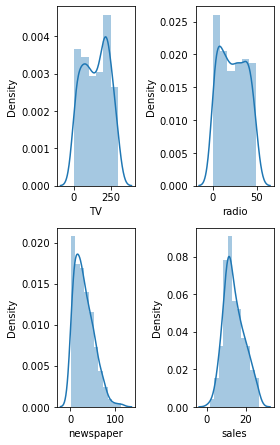

In [315]:
#distribution plot to check skewness
collist=sales.columns.values
ncol=2
nrows=4
plt.figure(figsize=(nrows,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(sales[collist[i]])
    plt.tight_layout()

In [316]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sales))
threshold=3
np.where(z>3)

(array([ 16, 101]), array([2, 2]))

In [317]:
np.abs(zscore(sales))<0

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
 

In [318]:
sales_1=sales[(z<3).all(axis=1)]
sales_1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [319]:
sales_1.shape

(198, 4)

In [320]:
#to know the percentage loss
loss_data=((200-198)/200)*100
loss_data

1.0

In [321]:
x=sales_1.iloc[:,:-1]
y=sales_1.iloc[:,:-1]

In [322]:
#remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [323]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [326]:
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

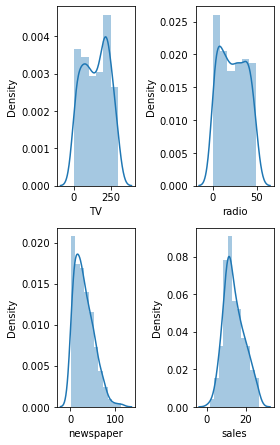

In [325]:
collist=sales.columns.values
ncol=2
nrows=4
plt.figure(figsize=(nrows,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(sales[collist[i]])
    plt.tight_layout()

In [264]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score
lr=LinearRegression()

In [135]:
sources=sales.drop('sales',axis=1)
target=sales['sales']

In [136]:
for i in range(0,150):
    sources_train,sources_test,target_train,target_test=train_test_split(sources,target,random_state=i,test_size=0.25)
    lr.fit(sources_train,target_train)
    pred_train=lr.predict(sources_train)
    pred_test=lr.predict(sources_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")
    

At random state 0,the training accuracy is:- 0.9072183330817297
At random state 0,the training accuracy is:- 0.8576396745320894


At random state 1,the training accuracy is:- 0.890307557755665
At random state 1,the training accuracy is:- 0.9156213613792232


At random state 2,the training accuracy is:- 0.9322395888715463
At random state 2,the training accuracy is:- 0.7558194773721316


At random state 3,the training accuracy is:- 0.9009381215792123
At random state 3,the training accuracy is:- 0.8829078884253614


At random state 4,the training accuracy is:- 0.8893590351773576
At random state 4,the training accuracy is:- 0.9157191830180073


At random state 5,the training accuracy is:- 0.9002172879046075
At random state 5,the training accuracy is:- 0.8838181418224292


At random state 6,the training accuracy is:- 0.8927531633218303
At random state 6,the training accuracy is:- 0.9117236844712061


At random state 7,the training accuracy is:- 0.8933316510408247
At random state 7,the train

In [140]:
sources_train,sources_test,target_train,target_test=train_test_split(sources,target,random_state=156,test_size=0.25)
lr.fit(sources_train,target_train)
pred_test=lr.predict(sources_test)
print(r2_score(target_test,pred_test))

0.9079628095123551


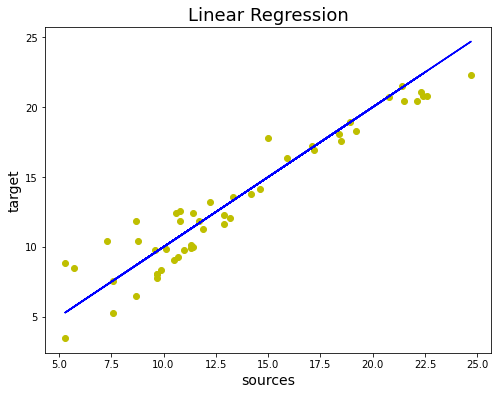

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='y')
plt.plot(target_test,target_test,color='b')
plt.xlabel('sources',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [344]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':[.002,.02,.2,20,200],
           'random_state':list(range(0,100))
            'n_estimators':[20,50,100],
            'max_features':['auto','sqrt']}
Gs=GridSearchCV(ls,parameters)
Gs.fit(sources_train,target_train)
print(Gs.best_params_)

SyntaxError: invalid syntax (<ipython-input-344-b00b33e11b47>, line 6)

In [341]:
ls=Lasso(alpha=0.2,random_state=0)
ls.fit(sources_train,target_train)
ls_score_training=ls.score(sources_train,target_train)
pred_ls=ls.predict(sources_test)
ls_score_training*100

89.26720613740807

In [145]:
lss=r2_score(target_test,pred_ls)
lss*100

90.82422093658063

In [152]:
from sklearn.model_selection import cross_val_score


In [151]:
from sklearn.model_selection import cross_val_score 
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
for j in range(2,10):
    cv_score=cross_val_score(lr,sources,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j},the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing {Test_accuracy}")
    print("\n")

At cross fold2,the cv score is 0.8908473589845056 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold3,the cv score is 0.8916464591145559 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold4,the cv score is 0.8900070660549507 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold5,the cv score is 0.8871063495438435 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold6,the cv score is 0.8899208882186672 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold7,the cv score is 0.8859930219823539 and accuracy score for training is -1.0226289709503202 and accuracy for the testing 0.9079628095123551


At cross fold8,the cv score is 0.8826686689919152 and accuracy score f

In [160]:
cv_score=cross_val_score(ls,sources,target,cv=2)
cv_mean=cv_score.mean()
cv_mean*100

89.117418068708

In [161]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
parameter={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
Gscv=GridSearchCV(rf,parameter)
Gscv.fit(sources_train,target_train)
print (Gscv.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [162]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(sources_train,target_train)
rf.score(sources_train,target_train)
pred_decision=rf.predict(sources_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,sources,target,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.92670686491431
Cross Val Score: 97.20707713933425


In [168]:
import pickle 
filename= 'Sales_prediction'
pickle.dump(rf, open(filename,'wb'))

loaded_model=pickle.load(open('Sales_prediction','rb'))
result=loaded_model.score(sources_test,target_test)
print(result*100)

98.92670686491431


In [169]:
conclusion=pd.DataFrame([loaded_model.predict(sources_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Predicted,10.316,13.583,11.57,14.593,21.854,8.645,20.427,11.818,17.854,9.986,...,4.577,12.254,12.369,20.667,8.664,11.473,6.806,13.441,21.58,18.359
Original,10.316,13.583,11.57,14.593,21.854,8.645,20.427,11.818,17.854,9.986,...,4.577,12.254,12.369,20.667,8.664,11.473,6.806,13.441,21.58,18.359
